In [180]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [181]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


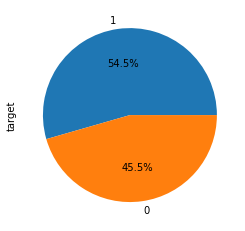

In [182]:
df.target.value_counts().plot(kind='pie',autopct='%.1f%%')
plt.show()

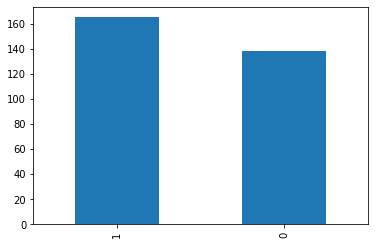

In [183]:
df.target.value_counts().plot(kind='bar')
plt.show()

In [184]:
X=df.iloc[:,:-1]
y=df['target']
print(X.shape,y.shape)

(303, 13) (303,)


In [185]:
featSelector = SelectKBest(chi2,k=5)
featSelector.fit(X,y)
print(featSelector.scores_)
print(featSelector.get_feature_names_out())

[ 23.28662399   7.57683451  62.59809791  14.8239245   23.93639448
   0.20293368   2.97827075 188.32047169  38.91437697  72.64425301
   9.8040952   66.44076512   5.79185297]
['cp' 'thalach' 'exang' 'oldpeak' 'ca']


In [186]:
features =X[featSelector.get_feature_names_out()]
features.head()

,cp,thalach,exang,oldpeak,ca
0,3,150,0,2.3,0
1,2,187,0,3.5,0
2,1,172,0,1.4,0
3,1,178,0,0.8,0
4,0,163,1,0.6,0


In [187]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(features)

In [188]:
xtrain,xtest,ytrain,ytest = train_test_split(scaledX,y,test_size=.2,random_state=1)

In [189]:
clf =SVC()
clf.fit(xtrain,ytrain)

SVC()

In [190]:
ypred = clf.predict(xtrain)
print(confusion_matrix(ytrain,ypred))
print(classification_report(ytrain,ypred))

[[ 87  21]
 [  8 126]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       108
           1       0.86      0.94      0.90       134

    accuracy                           0.88       242
   macro avg       0.89      0.87      0.88       242
weighted avg       0.88      0.88      0.88       242



### Decomposition Example

In [191]:
from sklearn.decomposition import PCA

In [192]:
pca = PCA(n_components=3)
decomposed_x=pca.fit_transform(X)

In [193]:
import plotly.express as px

In [194]:
px.scatter_3d(x=decomposed_x[:,0],y=decomposed_x[:,1],z=decomposed_x[:,2],color=y.values)

In [195]:
xtrain,xtest,ytrain,ytest = train_test_split(decomposed_x,y,test_size=.2,random_state=1)
clf =SVC()
clf.fit(xtrain,ytrain)

SVC()

In [196]:
ypred = clf.predict(xtrain)
print(confusion_matrix(ytrain,ypred))
print(classification_report(ytrain,ypred))

[[ 66  42]
 [ 21 113]]
              precision    recall  f1-score   support

           0       0.76      0.61      0.68       108
           1       0.73      0.84      0.78       134

    accuracy                           0.74       242
   macro avg       0.74      0.73      0.73       242
weighted avg       0.74      0.74      0.74       242



In [197]:
decomposed_x2 = pca.fit_transform(scaledX)
xtrain,xtest,ytrain,ytest = train_test_split(decomposed_x2,y,test_size=.2,random_state=1)
clf =SVC()
clf.fit(xtrain,ytrain)
ypred = clf.predict(xtrain)
print(confusion_matrix(ytrain,ypred))
print(classification_report(ytrain,ypred))

[[ 88  20]
 [ 10 124]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       108
           1       0.86      0.93      0.89       134

    accuracy                           0.88       242
   macro avg       0.88      0.87      0.87       242
weighted avg       0.88      0.88      0.88       242



In [198]:
from utils import plot_area_distribution

In [ ]:
plot_area_distribution(clf,xtrain,ytrain,'x','y')